### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
resume_data = pd.read_csv('cleaned_resume_data.csv')
resume_data["Resume"] = resume_data["Resume"].fillna("")
resume_data.head()

,Category,Resume,word_count
0,HR,hr administrator marketing associate hr admini...,500
1,HR,hr specialist us hr operations summary versati...,536
2,HR,hr director summary years experience recruitin...,712
3,HR,hr specialist summary dedicated driven dynamic...,262
4,HR,hr manager skill highlights hr skills hr depar...,885


### Label Encoding

In [3]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Resume,word_count,LebelEncoding
0,HR,hr administrator marketing associate hr admini...,500,19
1,HR,hr specialist us hr operations summary versati...,536,19
2,HR,hr director summary years experience recruitin...,712,19
3,HR,hr specialist summary dedicated driven dynamic...,262,19
4,HR,hr manager skill highlights hr skills hr depar...,885,19
...,...,...,...,...
2477,AVIATION,advanced level wheeled vehicle mechanic career...,765,6
2478,AVIATION,rank sgt e non commissioned officer charge bri...,484,6
2479,AVIATION,government relations communications organizati...,650,6
2480,AVIATION,geek squad agent professional profile support ...,182,6


In [4]:
resume_data['LebelEncoding'].describe()

count    2482.000000
mean       12.018936
std         6.935591
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: LebelEncoding, dtype: float64

In [5]:
resume_data.isnull().sum()

Category         0
Resume           0
word_count       0
LebelEncoding    0
dtype: int64

### Data Splitting

In [6]:
x = resume_data['Resume'].values
y = resume_data['Category'].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((1861,), (621,))

### TF-IDF Vectorization

In [8]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)
x_train.shape, x_test.shape

((1861, 32233), (621, 32233))

### Training and Evaluating K-Nearest Neighbors (KNN) Classifier

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN classifier
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)

# Predict on the test set
y_pred = model_knn.predict(x_test)

# Calculate accuracies for training and test sets
train_accuracy_knn = round(model_knn.score(x_train, y_train), 2)
test_accuracy_knn = round(model_knn.score(x_test, y_test), 2)

# Calculate additional evaluation metrics
accuracy_knn = round(accuracy_score(y_test, y_pred), 2)
precision_knn = round(precision_score(y_test, y_pred, average='macro'), 2)
recall_knn = round(recall_score(y_test, y_pred, average='macro'), 2)
f1_knn = round(f1_score(y_test, y_pred, average='macro'), 2)

# Display results
print(f'Accuracy of training set : {train_accuracy_knn}')
print(f'Accuracy of test set     : {test_accuracy_knn}')
print("Classification Report for KNN Classifier:\n", classification_report(y_test, y_pred))
print(f"Precision : {precision_knn}")
print(f"Recall    : {recall_knn}")
print(f"F1 Score  : {f1_knn}")
print(f"Overall Test Accuracy : {accuracy_knn}")


Accuracy of training set : 0.57
Accuracy of test set     : 0.54
Classification Report for KNN Classifier:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.44      0.93      0.60        30
              ADVOCATE       0.45      0.30      0.36        30
           AGRICULTURE       0.75      0.38      0.50        16
               APPAREL       0.80      0.33      0.47        24
                  ARTS       0.50      0.08      0.13        26
            AUTOMOBILE       1.00      0.11      0.20         9
              AVIATION       0.78      0.62      0.69        29
               BANKING       0.64      0.48      0.55        29
                   BPO       0.00      0.00      0.00         5
  BUSINESS-DEVELOPMENT       0.43      0.77      0.55        30
                  CHEF       0.81      0.76      0.79        29
          CONSTRUCTION       0.65      0.71      0.68        28
            CONSULTANT       0.12      0.03      0.05       

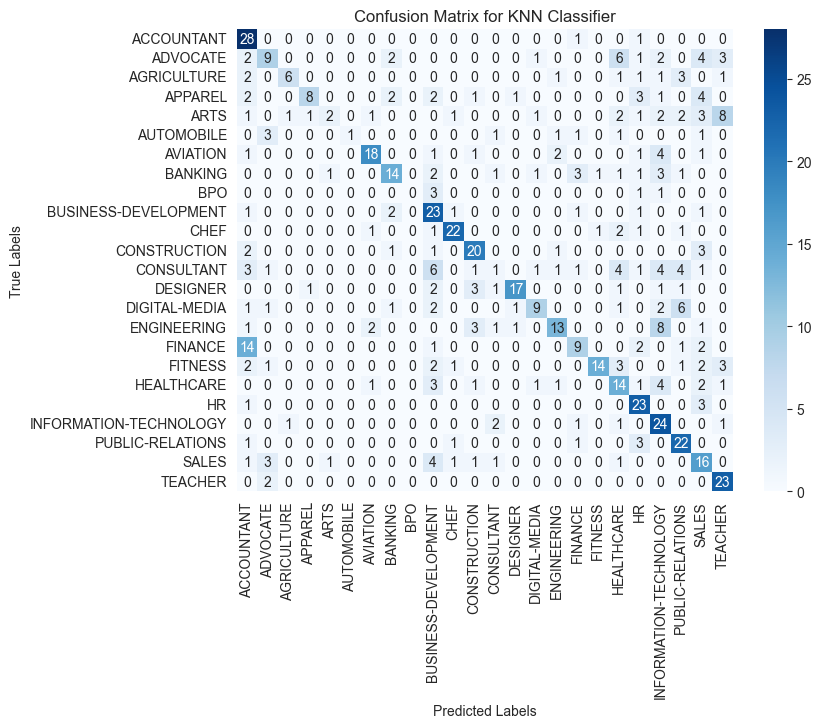

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
nb_cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_knn.classes_, yticklabels=model_knn.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

### Training and Evaluating Decision Tree Classifier

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree classifier
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)

# Predict on the test set
y_pred = model_DT.predict(x_test)

# Calculate accuracies for training and test sets
train_accuracy_DT = round(model_DT.score(x_train, y_train), 2)
test_accuracy_DT = round(model_DT.score(x_test, y_test), 2)

# Calculate additional evaluation metrics
accuracy_DT = round(accuracy_score(y_test, y_pred), 2)
precision_DT = round(precision_score(y_test, y_pred, average='macro'), 2)
recall_DT = round(recall_score(y_test, y_pred, average='macro'), 2)
f1_DT = round(f1_score(y_test, y_pred, average='macro'), 2)

# Display results
print(f'Accuracy of training set : {train_accuracy_DT}')
print(f'Accuracy of test set     : {test_accuracy_DT}')
print("Classification Report for Decision Tree Classifier:\n", classification_report(y_test, y_pred))
print(f"Precision : {precision_DT}")
print(f"Recall    : {recall_DT}")
print(f"F1 Score  : {f1_DT}")
print(f"Overall Test Accuracy : {accuracy_DT}")


Accuracy of training set : 1.0
Accuracy of test set     : 0.56
Classification Report for Decision Tree Classifier:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.78      0.70      0.74        30
              ADVOCATE       0.55      0.70      0.62        30
           AGRICULTURE       0.38      0.50      0.43        16
               APPAREL       0.40      0.25      0.31        24
                  ARTS       0.22      0.15      0.18        26
            AUTOMOBILE       0.17      0.11      0.13         9
              AVIATION       0.79      0.79      0.79        29
               BANKING       0.37      0.38      0.37        29
                   BPO       0.20      0.40      0.27         5
  BUSINESS-DEVELOPMENT       0.35      0.23      0.28        30
                  CHEF       0.77      0.79      0.78        29
          CONSTRUCTION       0.72      0.75      0.74        28
            CONSULTANT       0.38      0.34      0.

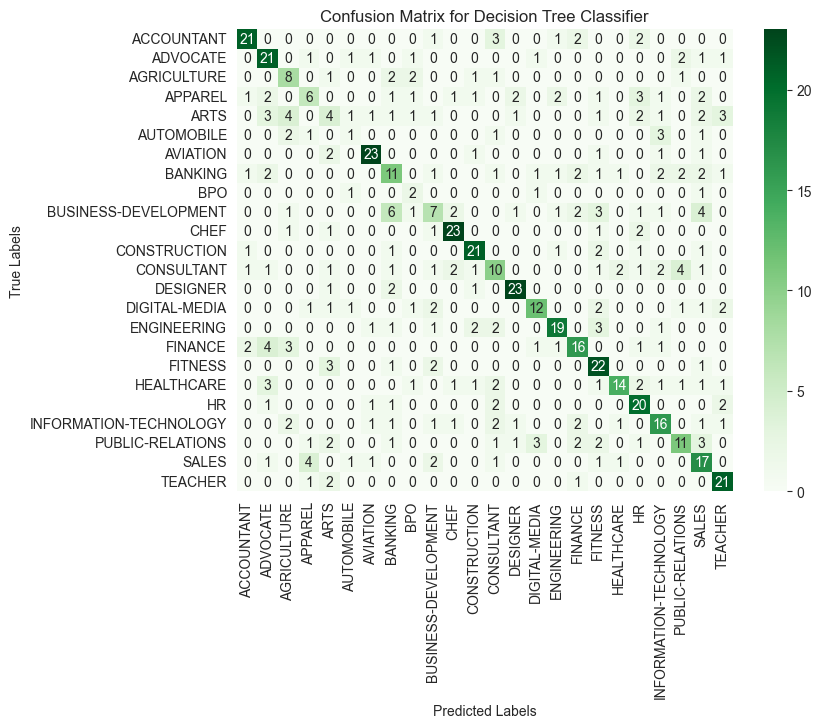

In [14]:
# Calculate the confusion matrix for the Decision Tree model
nb_cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Greens', xticklabels=model_DT.classes_, yticklabels=model_DT.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### Training and Evaluating Random Forest Classifier

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)

# Predict on the test set
y_pred = model_RF.predict(x_test)

# Calculate accuracies for training and test sets
train_accuracy_RF = round(model_RF.score(x_train, y_train), 2)
test_accuracy_RF = round(model_RF.score(x_test, y_test), 2)

# Calculate additional evaluation metrics
accuracy_RF = round(accuracy_score(y_test, y_pred), 2)
precision_RF = round(precision_score(y_test, y_pred, average='macro'), 2)
recall_RF = round(recall_score(y_test, y_pred, average='macro'), 2)
f1_RF = round(f1_score(y_test, y_pred, average='macro'), 2)

# Display results
print(f'Accuracy of training set : {train_accuracy_RF}')
print(f'Accuracy of test set     : {test_accuracy_RF}')
print("Classification Report for Random Forest Classifier:\n", classification_report(y_test, y_pred))
print(f"Precision : {precision_RF}")
print(f"Recall    : {recall_RF}")
print(f"F1 Score  : {f1_RF}")
print(f"Overall Test Accuracy : {accuracy_RF}")


Accuracy of training set : 1.0
Accuracy of test set     : 0.62
Classification Report for Random Forest Classifier:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.57      1.00      0.72        30
              ADVOCATE       0.62      0.50      0.56        30
           AGRICULTURE       0.78      0.44      0.56        16
               APPAREL       0.70      0.29      0.41        24
                  ARTS       0.00      0.00      0.00        26
            AUTOMOBILE       1.00      0.11      0.20         9
              AVIATION       0.73      0.83      0.77        29
               BANKING       0.74      0.48      0.58        29
                   BPO       0.00      0.00      0.00         5
  BUSINESS-DEVELOPMENT       0.45      0.57      0.50        30
                  CHEF       0.79      0.90      0.84        29
          CONSTRUCTION       0.92      0.79      0.85        28
            CONSULTANT       0.55      0.21      0.

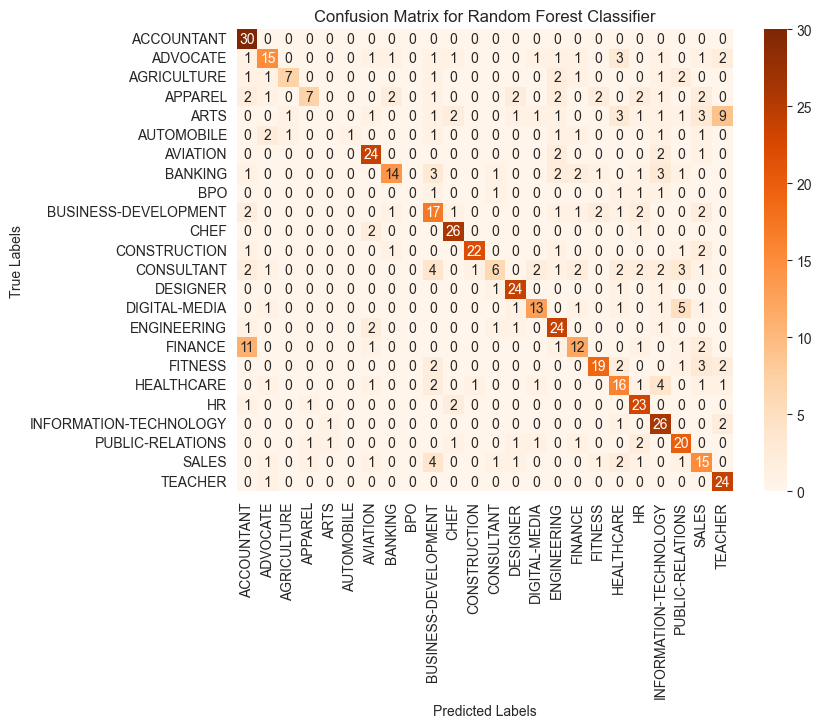

In [16]:
# Calculate the confusion matrix for the Random Forest model
nb_cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=model_RF.classes_, yticklabels=model_RF.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### Training and Evaluating Support Vector Machine (SVM) Classifier

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC

# Initialize and train the SVM classifier
model_svm = SVC()
model_svm.fit(x_train, y_train)

# Predict on the test set
y_pred = model_svm.predict(x_test)

# Calculate accuracies for training and test sets
train_accuracy_svm = round(model_svm.score(x_train, y_train), 2)
test_accuracy_svm = round(model_svm.score(x_test, y_test), 2)

# Calculate additional evaluation metrics
accuracy_svm = round(accuracy_score(y_test, y_pred), 2)
precision_svm = round(precision_score(y_test, y_pred, average='macro'), 2)
recall_svm = round(recall_score(y_test, y_pred, average='macro'), 2)
f1_svm = round(f1_score(y_test, y_pred, average='macro'), 2)

# Display results
print(f'Accuracy of training set : {train_accuracy_svm}')
print(f'Accuracy of test set     : {test_accuracy_svm}')
print("Classification Report for SVM Classifier:\n", classification_report(y_test, y_pred))
print(f"Precision : {precision_svm}")
print(f"Recall    : {recall_svm}")
print(f"F1 Score  : {f1_svm}")
print(f"Overall Test Accuracy : {accuracy_svm}")


Accuracy of training set : 0.99
Accuracy of test set     : 0.59
Classification Report for SVM Classifier:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.70      0.93      0.80        30
              ADVOCATE       0.48      0.47      0.47        30
           AGRICULTURE       1.00      0.12      0.22        16
               APPAREL       0.83      0.21      0.33        24
                  ARTS       0.42      0.19      0.26        26
            AUTOMOBILE       0.00      0.00      0.00         9
              AVIATION       0.75      0.72      0.74        29
               BANKING       0.63      0.59      0.61        29
                   BPO       0.00      0.00      0.00         5
  BUSINESS-DEVELOPMENT       0.48      0.83      0.61        30
                  CHEF       0.95      0.69      0.80        29
          CONSTRUCTION       0.81      0.75      0.78        28
            CONSULTANT       0.18      0.17      0.18       

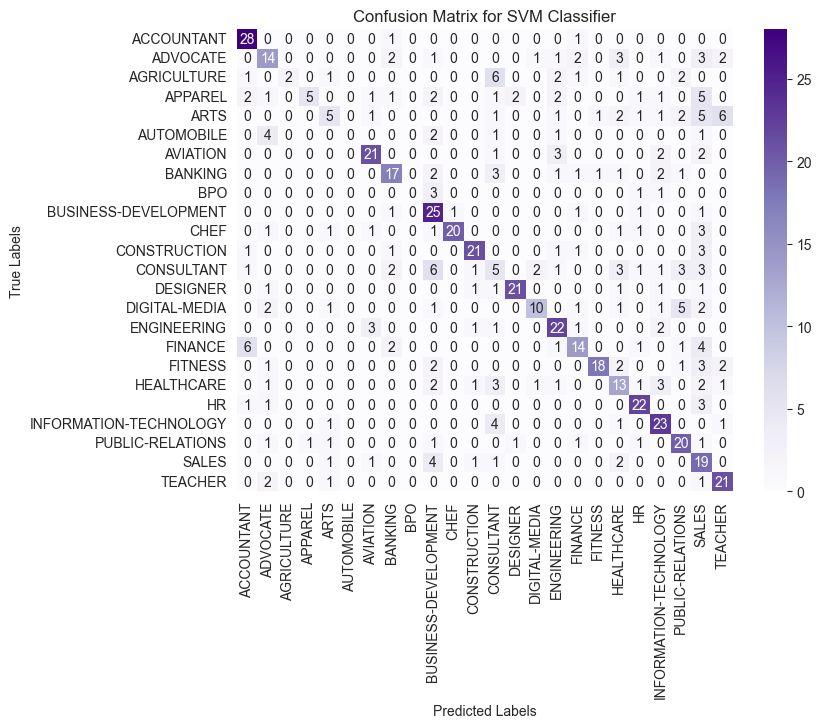

In [19]:
# Calculate the confusion matrix for the SVM model
nb_cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Purples', xticklabels=model_svm.classes_, yticklabels=model_svm.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


### Training and Evaluating Logistic Regression Classifier

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression classifier
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)

# Predict on the test set
y_pred = model_lgr.predict(x_test)

# Calculate accuracies for training and test sets
train_accuracy_lgr = round(model_lgr.score(x_train, y_train), 2)
test_accuracy_lgr = round(model_lgr.score(x_test, y_test), 2)

# Calculate additional evaluation metrics
accuracy_lgr = round(accuracy_score(y_test, y_pred), 2)
precision_lgr = round(precision_score(y_test, y_pred, average='macro'), 2)
recall_lgr = round(recall_score(y_test, y_pred, average='macro'), 2)
f1_lgr = round(f1_score(y_test, y_pred, average='macro'), 2)

# Display results
print(f'Accuracy of training set : {train_accuracy_lgr}')
print(f'Accuracy of test set     : {test_accuracy_lgr}')
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred))
print(f"Precision : {precision_lgr}")
print(f"Recall    : {recall_lgr}")
print(f"F1 Score  : {f1_lgr}")
print(f"Overall Test Accuracy : {accuracy_lgr}")


Accuracy of training set : 0.86
Accuracy of test set     : 0.61
Classification Report for Logistic Regression:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.60      0.97      0.74        30
              ADVOCATE       0.57      0.43      0.49        30
           AGRICULTURE       0.86      0.38      0.52        16
               APPAREL       0.62      0.21      0.31        24
                  ARTS       0.44      0.15      0.23        26
            AUTOMOBILE       0.00      0.00      0.00         9
              AVIATION       0.77      0.79      0.78        29
               BANKING       0.68      0.59      0.63        29
                   BPO       0.00      0.00      0.00         5
  BUSINESS-DEVELOPMENT       0.51      0.77      0.61        30
                  CHEF       0.92      0.79      0.85        29
          CONSTRUCTION       0.72      0.75      0.74        28
            CONSULTANT       0.38      0.17      0.24  

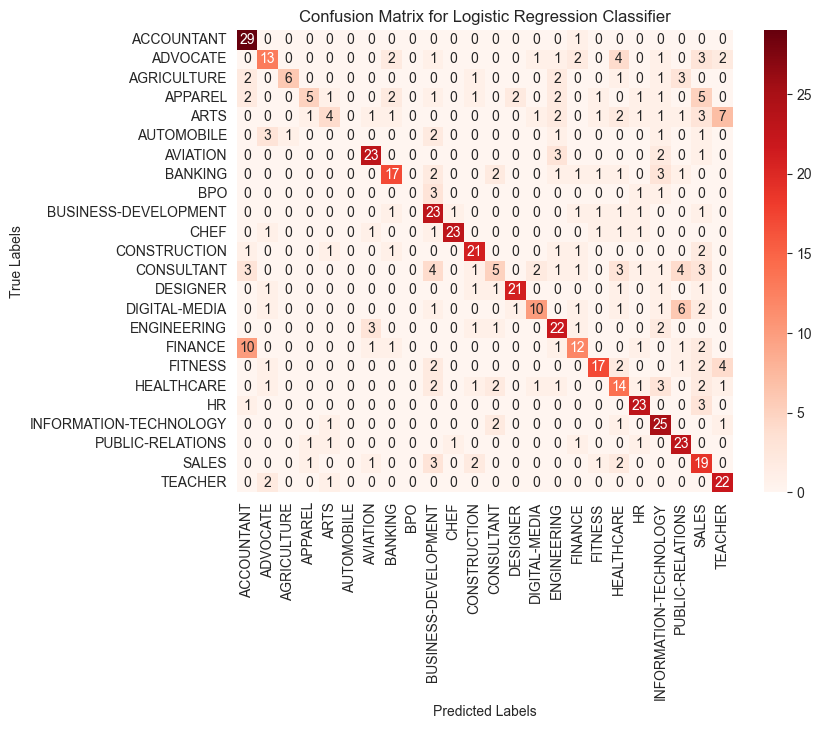

In [22]:
# Calculate the confusion matrix for the Logistic Regression model
nb_cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Reds', xticklabels=model_lgr.classes_, yticklabels=model_lgr.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

### Training and Evaluating Bagging Classifier with KNN as Base Estimator

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the Bagging Classifier with KNN as base estimator
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)

# Predict on the test set
y_pred = model_bagg.predict(x_test)

# Calculate accuracies for training and test sets
train_accuracy_bagg = round(model_bagg.score(x_train, y_train), 2)
test_accuracy_bagg = round(model_bagg.score(x_test, y_test), 2)

# Calculate additional evaluation metrics
accuracy_bagg = round(accuracy_score(y_test, y_pred), 2)
precision_bagg = round(precision_score(y_test, y_pred, average='macro'), 2)
recall_bagg = round(recall_score(y_test, y_pred, average='macro'), 2)
f1_bagg = round(f1_score(y_test, y_pred, average='macro'), 2)

# Display results
print(f'Accuracy of training set : {train_accuracy_bagg}')
print(f'Accuracy of test set     : {test_accuracy_bagg}')
print("Classification Report for Bagging Classifier:\n", classification_report(y_test, y_pred))
print(f"Precision : {precision_bagg}")
print(f"Recall    : {recall_bagg}")
print(f"F1 Score  : {f1_bagg}")
print(f"Overall Test Accuracy : {accuracy_bagg}")


Accuracy of training set : 0.71
Accuracy of test set     : 0.53
Classification Report for Bagging Classifier:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.48      0.97      0.64        30
              ADVOCATE       0.56      0.30      0.39        30
           AGRICULTURE       0.83      0.31      0.45        16
               APPAREL       0.78      0.29      0.42        24
                  ARTS       0.29      0.08      0.12        26
            AUTOMOBILE       1.00      0.11      0.20         9
              AVIATION       0.60      0.62      0.61        29
               BANKING       0.70      0.55      0.62        29
                   BPO       0.00      0.00      0.00         5
  BUSINESS-DEVELOPMENT       0.21      0.80      0.33        30
                  CHEF       0.79      0.79      0.79        29
          CONSTRUCTION       0.84      0.75      0.79        28
            CONSULTANT       0.38      0.10      0.16   

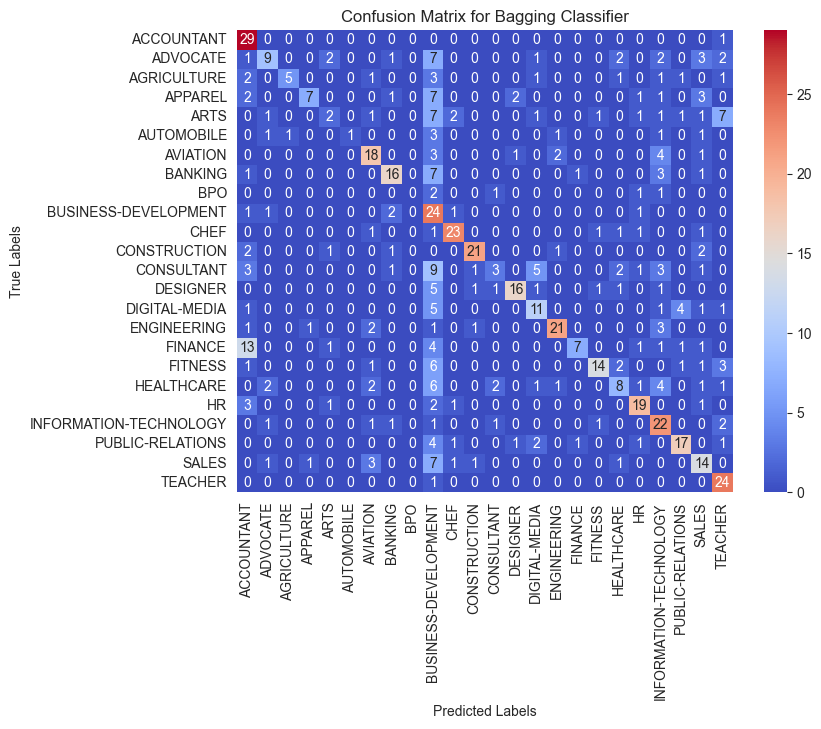

In [25]:
# Calculate the confusion matrix for the Bagging Classifier model
nb_cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=model_bagg.classes_, yticklabels=model_bagg.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

### CNN Model

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

#### Data Preparation for Convolutional Neural Network (CNN) Model

In [27]:
# CNN Model
# Tokenize and pad sequences for CNN
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(resume_data["Resume"])
sequences = tokenizer.texts_to_sequences(resume_data["Resume"])
max_length = 200
X = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
y = resume_data["LebelEncoding"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Defining Convolutional Neural Network (CNN) Model

In [28]:
# Define CNN model
embedding_dim = 50
model_cnn = Sequential([
    Embedding(input_dim=5000, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=256, kernel_size=5, activation='relu'),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.7),
    Dense(len(Encoder.classes_), activation='softmax')
])

#### Training

In [29]:
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
history=model_cnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.0516 - loss: 3.1763 - val_accuracy: 0.0353 - val_loss: 3.1651
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0556 - loss: 3.1589 - val_accuracy: 0.0982 - val_loss: 3.1494
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0722 - loss: 3.1148 - val_accuracy: 0.1688 - val_loss: 3.0025
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1473 - loss: 2.9200 - val_accuracy: 0.2317 - val_loss: 2.6261
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2196 - loss: 2.6136 - val_accuracy: 0.3904 - val_loss: 2.2432
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3174 - loss: 2.2461 - val_accuracy: 0.4962 - val_loss: 1.9328
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4401 - loss: 1.9266 - val_accuracy: 0.5945 - val_loss: 1.7046
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4884 - loss: 1.6639 - val_accuracy: 0.6297 - v

#### Evaluating the CNN Model Performance

In [31]:

y_pred_cnn = model_cnn.predict(X_test).argmax(axis=1)
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, y_pred_cnn, average='macro')
recall_cnn = recall_score(y_test, y_pred_cnn, average='macro')
f1_cnn = f1_score(y_test, y_pred_cnn, average='macro')
# Calculate train accuracy
train_accuracy_cnn = model_cnn.evaluate(X_train, y_train, verbose=0)[1]
print("\nCNN Model Evaluation:")
print(f"Train Accuracy : {train_accuracy_cnn:.2f}")
print(f"Test Accuracy : {accuracy_cnn:.2f}")
print(f"Precision     : {precision_cnn:.2f}")
print(f"Recall        : {recall_cnn:.2f}")
print(f"F1 Score      : {f1_cnn:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_cnn))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

CNN Model Evaluation:
Train Accuracy : 0.92
Test Accuracy : 0.71
Precision     : 0.65
Recall        : 0.64
F1 Score      : 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.92        31
           1       0.88      0.71      0.79        31
           2       0.06      0.09      0.07        11
           3       0.19      0.26      0.22        19
           4       0.31      0.33      0.32        24
           5       0.00      0.00      0.00         7
           6       0.56      0.61      0.58        23
           7       0.67      0.60      0.63        20
           8       0.00      0.00      0.00         2
           9       0.92      1.00      0.96        23
          10       1.00      0.92      0.96        24
          11       0.92      0.77      0.84        30
          12       0.61      0.69      0.65        16
          13       0.89      0.89      0.89        

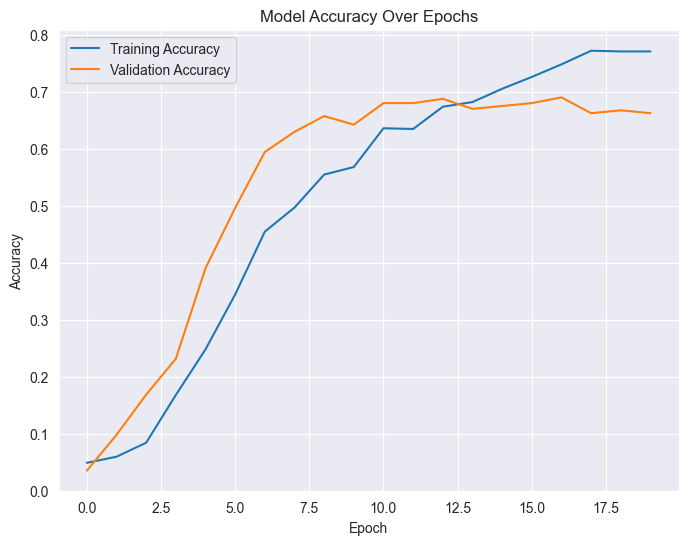

In [32]:
import matplotlib.pyplot as plt

# Extract accuracy values from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


### Evaluation Metrics for All Models

In [34]:
import pandas as pd

# Models (add the model names)
models = [
    "KNN Classifier", "Decision Tree Classifier", "Random Forest Classifier", 
    "SVM Classifier", "Logistic Regression", "Bagging Classifier", "CNN Model"
]

# Use the saved evaluation metrics from earlier
train_accuracies = [
    train_accuracy_knn, train_accuracy_DT, train_accuracy_RF, 
    train_accuracy_svm, train_accuracy_lgr, train_accuracy_bagg, train_accuracy_cnn
]

test_accuracies = [
    accuracy_knn, accuracy_DT, accuracy_RF, accuracy_svm, 
    accuracy_lgr, accuracy_bagg, accuracy_cnn
]

precisions = [
    precision_knn, precision_DT, precision_RF, precision_svm, 
    precision_lgr, precision_bagg, precision_cnn
]

recalls = [
    recall_knn, recall_DT, recall_RF, recall_svm, 
    recall_lgr, recall_bagg, recall_cnn
]

f1_scores = [
    f1_knn, f1_DT, f1_RF, f1_svm, f1_lgr, f1_bagg, f1_cnn
]

# Create a dictionary with the evaluation metrics for each model
evaluation_dict = {
    "Model": models,
    "Train Accuracy (%)": [round(acc, 2) for acc in train_accuracies],
    "Test Accuracy (%)": [round(acc, 2) for acc in test_accuracies],
    "Precision (%)": [round(prec, 2) for prec in precisions],
    "Recall (%)": [round(rec, 2) for rec in recalls],
    "F1-Score (%)": [round(f1, 2) for f1 in f1_scores]
}

table = pd.DataFrame(evaluation_dict)
table


,Model,Train Accuracy (%),Test Accuracy (%),Precision (%),Recall (%),F1-Score (%)
0,KNN Classifier,0.57,0.54,0.57,0.51,0.49
1,Decision Tree Classifier,1.00,0.56,0.53,0.54,0.53
2,Random Forest Classifier,1.00,0.62,0.60,0.58,0.56
3,SVM Classifier,0.99,0.59,0.59,0.54,0.53
4,Logistic Regression,0.86,0.61,0.57,0.56,0.54
5,Bagging Classifier,0.71,0.53,0.60,0.50,0.49
6,CNN Model,0.92,0.71,0.65,0.64,0.64


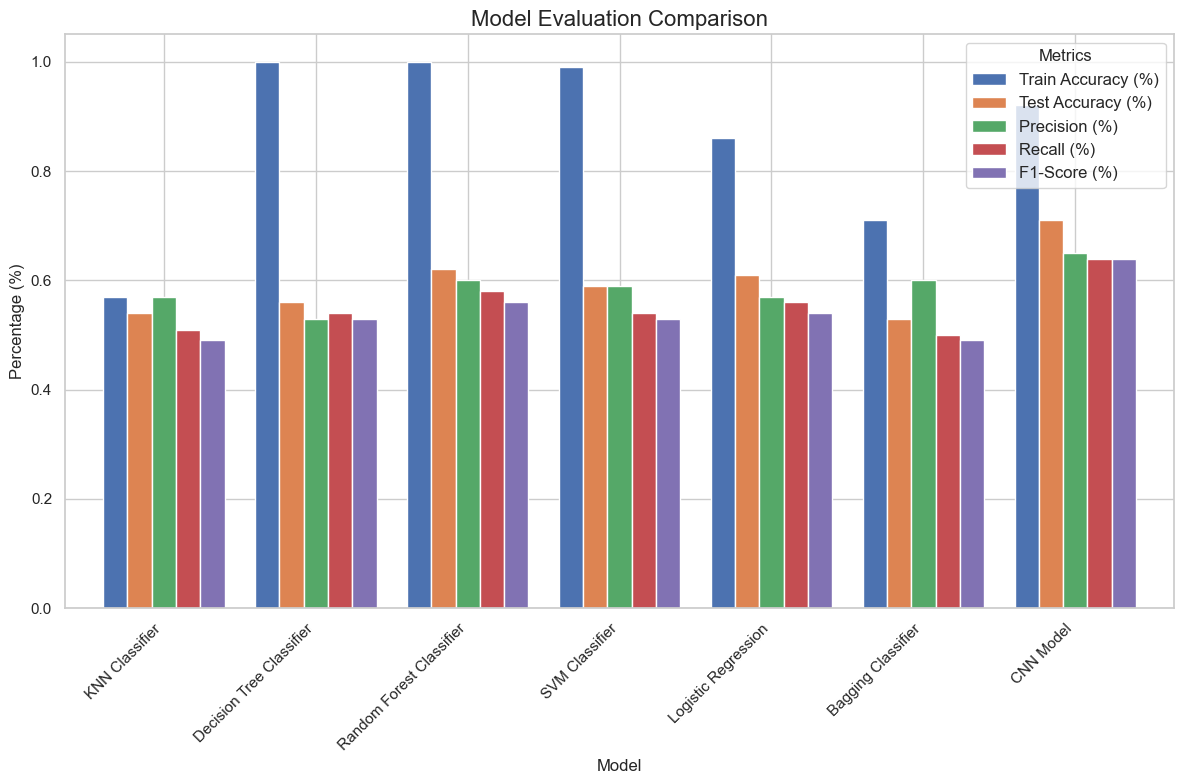

In [35]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a comparison bar plot for all evaluation metrics
evaluation_table.set_index('Model').plot(kind='bar', figsize=(12, 8), width=0.8)

# Adding title and labels
plt.title("Model Evaluation Comparison", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metrics", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

### Identifying the Best Model Based on Evaluation Metrics

In [39]:
# Identify the best model based on different metrics and their corresponding values
best_model_accuracy = evaluation_table.loc[evaluation_table['Test Accuracy (%)'].idxmax()]
best_model_precision = evaluation_table.loc[evaluation_table['Precision (%)'].idxmax()]
best_model_recall = evaluation_table.loc[evaluation_table['Recall (%)'].idxmax()]
best_model_f1 = evaluation_table.loc[evaluation_table['F1-Score (%)'].idxmax()]

# Print the best models and their corresponding values based on each metric
print("\nBest Model based on Test Accuracy:")
print(f"Model: {best_model_accuracy['Model']}, Test Accuracy: {best_model_accuracy['Test Accuracy (%)']}%")

print("\nBest Model based on Precision:")
print(f"Model: {best_model_precision['Model']}, Precision: {best_model_precision['Precision (%)']}%")

print("\nBest Model based on Recall:")
print(f"Model: {best_model_recall['Model']}, Recall: {best_model_recall['Recall (%)']}%")

print("\nBest Model based on F1-Score:")
print(f"Model: {best_model_f1['Model']}, F1-Score: {best_model_f1['F1-Score (%)']}%")


Best Model based on Test Accuracy:
Model: CNN Model, Test Accuracy: 0.71%

Best Model based on Precision:
Model: CNN Model, Precision: 0.65%

Best Model based on Recall:
Model: CNN Model, Recall: 0.64%

Best Model based on F1-Score:
Model: CNN Model, F1-Score: 0.64%
